In [592]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import math
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from math import sqrt
from sklearn.model_selection import TimeSeriesSplit
from neuralprophet import NeuralProphet
#from google.colab import files

In [593]:
data= pd.read_csv('../TSLA_Dataset.csv')
#Separate date for future plotting
train_dates = pd.to_datetime(data['Date'])

#Preparing the columns to be variables
cols = list(data)[1:5]

data.drop('Adj Close', axis=1, inplace=True)
data.drop('Volume', axis=1, inplace=True)
data_for_train=data[cols].astype(float)
#data.to_csv('TSLA_Dataset'+'_preprocessed.csv',index=False)
print(data_for_train.head())
data_for_train.describe()

        Open       High        Low      Close
0  44.618000  45.136002  44.450001  44.481998
1  44.574001  44.650002  42.652000  43.862000
2  42.910000  43.299999  41.431999  42.018002
3  42.012001  42.840000  40.841999  42.256001
4  42.669998  42.956001  41.956001  42.189999


,Open,High,Low,Close
count,1884.000000,1884.000000,1884.000000,1884.000000
mean,235.497948,240.848061,229.688691,235.426783
std,312.416755,319.784103,304.130902,312.065103
min,28.464001,30.993999,28.209999,28.733999
25%,47.385002,48.397999,46.717502,47.653500
50%,63.213002,64.347000,62.094999,63.274999
75%,328.939491,334.070008,311.800003,319.899505
max,1234.410034,1243.489990,1217.000000,1229.910034


In [594]:
from sklearn.preprocessing import MinMaxScaler

x_dataset=data_for_train.iloc[:,0:4].values
sc = MinMaxScaler(feature_range = (0, 1))
x_train_scaled=sc.fit_transform(x_dataset)
window_size=5
future_days=1
xtrain=[]
ytrain=[]
for i in range(window_size,len(x_train_scaled)-future_days+1):
    xtrain.append(x_train_scaled[i-window_size:i, 0:x_train_scaled.shape[1]])
    ytrain.append(x_train_scaled[i+future_days-1:i+future_days, 3])

xtrain, ytrain=np.array(xtrain),np.array(ytrain)
xtrain=np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],4))

In [595]:
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

regressor.add(LSTM(units = 100, activation='relu',return_sequences = True, input_shape = (xtrain.shape[1], xtrain.shape[2])))#Input layer
regressor.add(Dropout(0.3))

regressor.add(Bidirectional(LSTM(units = 100, return_sequences = False)))#Hidden layer 1
regressor.add(Dropout(0.3))
#regressor.add(Bidirectional(LSTM(units = 50,  return_sequences = False)))#Hidden layer 2
#regressor.add(Dropout(0.2))
#regressor.add(Bidirectional(LSTM(units = 50, activation='relu', return_sequences = True)))#Hidden layer 3
#regressor.add(Dropout(0.2))
#regressor.add(Bidirectional(LSTM(units = 75, activation='relu', return_sequences=False)))#Hidden layer 4
#regressor.add(Dropout(0.1))

regressor.add(Dense(units = 1))#Ouput layer

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mse','accuracy'])

history=regressor.fit(xtrain, ytrain, epochs = 100, batch_size = 128, validation_split=0.3)
regressor.summary()

Epoch 1/100
11/11 [==============================] - 117s 1s/step - loss: 3.9575e-04 - mse: 3.9575e-04 - accuracy: 7.6046e-04 - val_loss: 0.2046 - val_mse: 0.2046 - val_accuracy: 0.0000e+00
Epoch 2/100
11/11 [==============================] - 2s 123ms/step - loss: 1.7405e-04 - mse: 1.7405e-04 - accuracy: 7.6046e-04 - val_loss: 0.0963 - val_mse: 0.0963 - val_accuracy: 0.0000e+00
Epoch 3/100
11/11 [==============================] - 1s 113ms/step - loss: 6.3740e-05 - mse: 6.3740e-05 - accuracy: 7.6046e-04 - val_loss: 0.0106 - val_mse: 0.0106 - val_accuracy: 0.0018
Epoch 4/100
11/11 [==============================] - 1s 88ms/step - loss: 2.5174e-05 - mse: 2.5174e-05 - accuracy: 7.6046e-04 - val_loss: 0.0024 - val_mse: 0.0024 - val_accuracy: 0.0018
Epoch 5/100
11/11 [==============================] - 1s 70ms/step - loss: 2.5971e-05 - mse: 2.5971e-05 - accuracy: 7.6046e-04 - val_loss: 0.0037 - val_mse: 0.0037 - val_accuracy: 0.0018
Epoch 6/100
11/11 [==============================] - 1s 66ms

In [596]:

#company_list = ['AAPL', 'BAC', 'BCS', 'JPM', 'SMSN.IL']
#company_name = ["Apple Inc.", "Bank of America Coorporation", "Barclays PLC", "JPMorgan Chase & Co.", "Samsung Electronics Co. Ltd."]

#Create a dictionnary for the list of our companies
#dic={
#    "AAPL":"Apple Inc.",
#    "BAC":"Bank of America Coorporation",
#    "BCS":"Barclays PLC",
#    "JPM":"JPMorgan Chase & Co.",
#    "SMSN.IL":"Samsung Electronics Co. Ltd."
#}

#for j in company_list :
dataset= pd.read_csv('../BCS_Dataset.csv')
print("Start of prediction for BCS")
cols = list(dataset)[1:5]
dataset.drop('Adj Close', axis=1, inplace=True)
dataset.drop('Volume', axis=1, inplace=True)
data_for_train=dataset[cols].astype(float)
x_dataset=data_for_train.iloc[1259:,0:4].values
realVal=data_for_train.iloc[1259:,3:4]  
sc_real=MinMaxScaler(feature_range = (0, 1))
x_test_scaled=sc.fit_transform(x_dataset)
y_test_scaled=sc_real.fit_transform(realVal)
window_size=5
future_days=1
xtest=[]
    
for i in range(window_size,len(x_test_scaled)-future_days+1):
    xtest.append(x_test_scaled[i-window_size:i, 0:x_train_scaled.shape[1]])
    
xtest=np.array(xtest)
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],4))
    
predict = regressor.predict(xtest)
scores=regressor.evaluate(xtest,predict)
predict = sc_real.inverse_transform(predict)#This is our input for the Neural Prophet model

Start of prediction for BCS
20/20 [==============================] - 0s 6ms/step - loss: 2.6078e-15 - mse: 2.6078e-15 - accuracy: 0.0000e+00


In [597]:
data= pd.read_csv('../TSLA_Dataset.csv')
data.head()
data.drop('Adj Close', axis=1, inplace=True)
data.drop('Volume', axis=1, inplace=True)
data.drop('Open', axis=1, inplace=True)
data.drop('High', axis=1, inplace=True)
data.drop('Low', axis=1, inplace=True)
#data.drop('Close', axis=1, inplace=True)
#data_new=data.rename(columns={'Date':'ds'})
data_new=data.rename(columns={'Date':'ds', 'Close':'y'})
data_new['ds'] = pd.DatetimeIndex(data_new['ds'])
data_new.describe()
data_new.head()

,ds,y
0,2014-12-31,44.481998
1,2015-01-02,43.862000
2,2015-01-05,42.018002
3,2015-01-06,42.256001
4,2015-01-07,42.189999


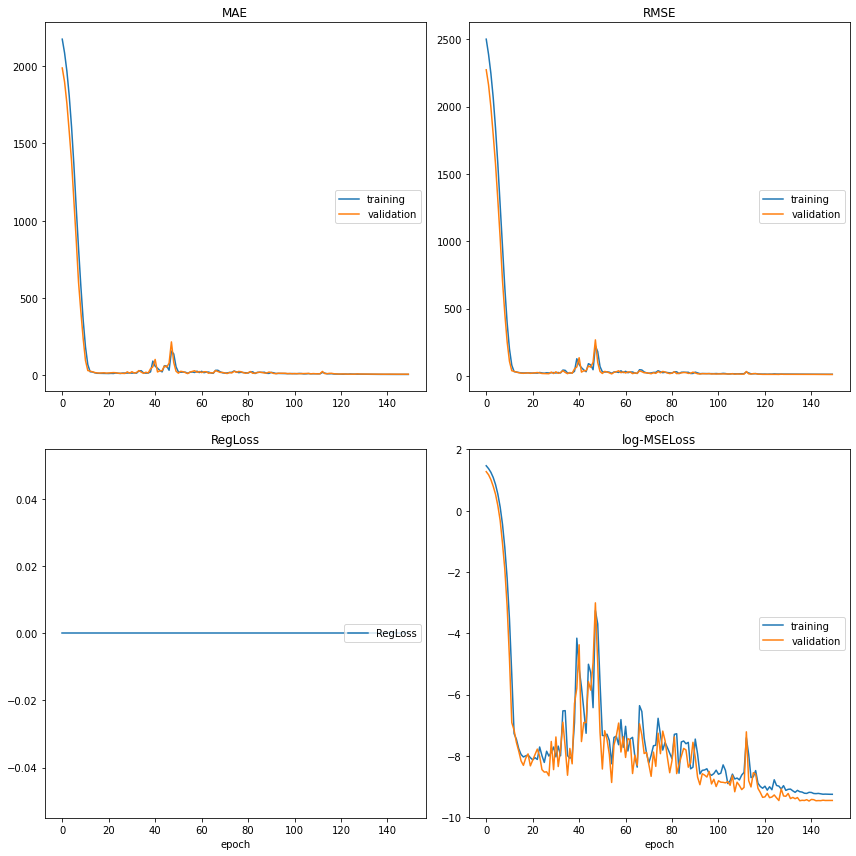

MAE
	training         	 (min:    5.381, max: 2175.043, cur:    5.394)
	validation       	 (min:    6.839, max: 1988.517, cur:    6.940)
RMSE
	training         	 (min:   11.389, max: 2500.027, cur:   11.480)
	validation       	 (min:   10.519, max: 2272.689, cur:   10.620)
RegLoss
	RegLoss          	 (min:    0.000, max:    0.000, cur:    0.000)
log-MSELoss
	training         	 (min:   -9.256, max:    1.468, cur:   -9.256)
	validation       	 (min:   -9.476, max:    1.275, cur:   -9.457)


,MSELoss,MAE,RMSE,RegLoss,MSELoss_val,MAE_val,RMSE_val
149,0.000096,5.393731,11.480264,0.0,0.000078,6.940435,10.620439


In [598]:
#model = NeuralProphet()

model = NeuralProphet(
    growth="off",    # Determine trend types: 'linear', 'discontinuous', 'off'
    changepoints=None,  # list of dates that may include change points (None->automatic)
    #n_changepoints=5,
   #changepoints_range=0.8,
   #trend_reg=0,
    #trend_reg_threshold=False,
    yearly_seasonality="auto",
    weekly_seasonality="auto",
    daily_seasonality="auto",
    #seasonality_mode="additive",
    #seasonality_reg=0,
    n_forecasts=1, #The model will forecast one step into the future
    n_lags=3*5, #Using 5 steps prediction window
    #ar_reg=1,
    batch_size=128,
    num_hidden_layers=0, #Number of hidden layers
    d_hidden=None,      # Number of neurons in each hidden layer of AR-Net
    #ar_sparsity=None,   # Sparcity in the AR coefficients
    learning_rate=0.2,
    epochs=150,
    loss_func="mse",
    normalize="minmax",   # Type of normalization ('minmax', 'standardize', 'soft', 'off')
    impute_missing=True
)
df = data_new.copy(deep=True)#Using a deep  Neural Network
df_train, df_test = model.split_df(df_train, freq='D', valid_p = 0.2)
metrics_train = model.fit(df, freq='D', validation_df=df_test, progress='plot-all')
metrics_train.tail(1)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.29% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (NP.forecaster._make_future_dataframe) - Insufficient data for 620 historic forecasts, reduced to 605.
WARNING - (py.warnings._showwarnmsg) - C:\Users\HP\anaconda3\lib\site-packages\neuralprophet\forecaster.py:2060: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.296% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.296% of the data.


Start of prediction for Nvidia Coorporation


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.forecaster.__handle_missing_data) - 278 missing dates added.
INFO - (NP.forecaster.__handle_missing_data) - 278 NaN values in column y were auto-imputed.
WARNING - (py.warnings._showwarnmsg) - C:\Users\HP\anaconda3\lib\site-packages\neuralprophet\forecaster.py:1406: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)



Text(0.5, 1.0, 'Nvidia Coorporation Stock Price Prediction')

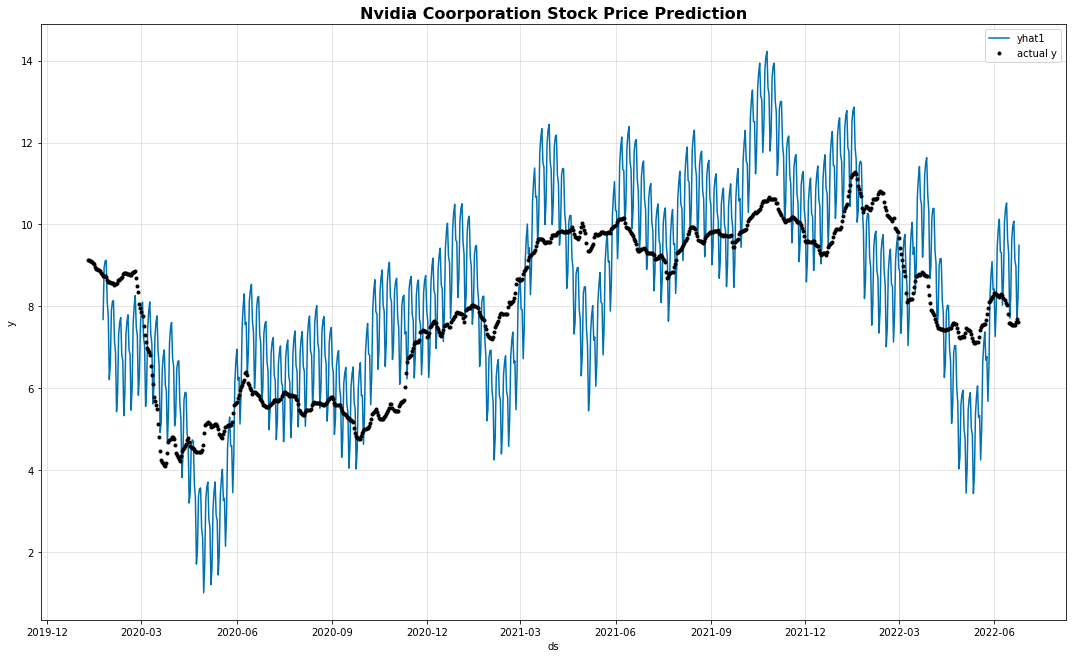

In [600]:
#Start predictions for all our companies
#company_list = ['AAPL', 'BAC', 'BCS', 'JPM', 'SMSN.IL']
#company_name = ["Apple Inc.", "Bank of America Coorporation", "Barclays PLC", "JPMorgan Chase & Co.", "Samsung Electronics Co. Ltd."]

#Create a dictionnary for the list of our companies
#dic={
#    "AAPL":"Apple Inc.",
#    "BAC":"Bank of America Coorporation",
#    "BCS":"Barclays PLC",
#    "JPM":"JPMorgan Chase & Co.",
#    "SMSN.IL":"Samsung Electronics Co. Ltd."
#}

#for i in company_list :

data= pd.read_csv('../BCS_Dataset.csv')
print("Start of prediction for Nvidia Coorporation")
data.drop('Adj Close', axis=1, inplace=True)
data.drop('Volume', axis=1, inplace=True)
data.drop('Open', axis=1, inplace=True)
data.drop('High', axis=1, inplace=True)
data.drop('Low', axis=1, inplace=True)
data.drop('Close', axis=1, inplace=True)
data_new=data.rename(columns={'Date':'ds'})
data_new['ds'] = pd.DatetimeIndex(data_new['ds'])
neural_data=data_new.iloc[1264:,0:1]
df=pd.DataFrame(neural_data)

df.insert(1,"y",predict,True)
dftest = df.copy(deep=True)#Using a deep  Neural Network
#df_train, df_test = model.split_df(dftest, freq='D', valid_p = 0.2)
future = model.make_future_dataframe(dftest, periods=1, n_historic_predictions=len(dftest))
forecast = model.predict(future)
#model.plot_parameters()
fig, ax = plt.subplots(figsize=(15, 9))
model.plot(forecast,ax=ax)
ax.set_title('Nvidia Coorporation Stock Price Prediction', fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Model Loss')

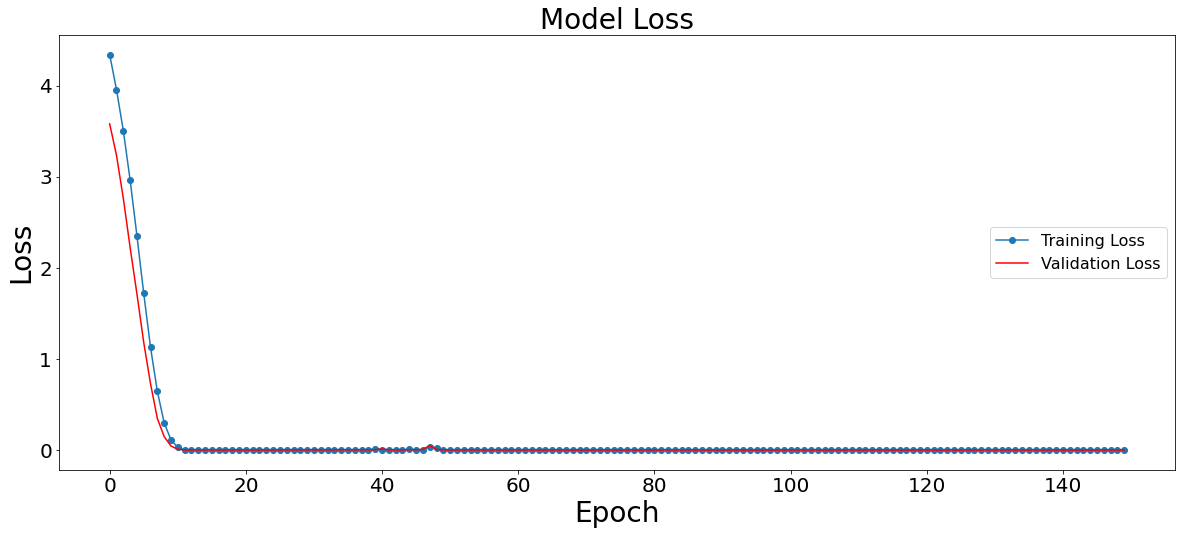

In [599]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(metrics_train["MSELoss"], '-o', label="Training Loss")  
ax.plot(metrics_train["MSELoss_val"], '-r', label="Validation Loss")
ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("Epoch", fontsize=28)
ax.set_ylabel("Loss", fontsize=28)
ax.set_title("Model Loss", fontsize=28)

In [601]:
#Compute the error metrics for the prediction
from sklearn.metrics import r2_score
data= pd.read_csv('../BCS_Dataset.csv')
data.drop('Adj Close', axis=1, inplace=True)
data.drop('Volume', axis=1, inplace=True)
data.drop('Open', axis=1, inplace=True)
data.drop('High', axis=1, inplace=True)
data.drop('Low', axis=1, inplace=True)
#data.info()
y=data.iloc[:,0:2]
y['Date']=y['Date'].astype('datetime64[ns]')
ren_forecast=forecast.rename(columns={'ds':'Date'})
merged_data=pd.merge(y,ren_forecast,how="outer",on="Date")
merged_data=merged_data.dropna()
y=merged_data.iloc[:,1:2]
yhat=merged_data.iloc[:,3:4]

MAE=mean_absolute_error(y,yhat)
MAPE=mean_absolute_percentage_error(y,yhat)
RMSE=mean_squared_error(y,yhat,squared=False)
r=r2_score(y, yhat)
print("MAE value = ",MAE)
print("MAPE value = ",MAPE*100)
print("RMSE value = ",RMSE)
print("r2 score = ",r)

MAE value =  1.340196018156458
MAPE value =  17.841265349653728
RMSE value =  1.6717226258224154
r2 score =  0.3827502637666589
